<a href="https://colab.research.google.com/github/Augus-123/DAA-CIA/blob/main/Newton_raphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Average Time Complexity: 5.828857421875e-05 seconds
Average Accuracy: 921.09


<ipython-input-12-27a452e7c155>:14: RuntimeWarning: overflow encountered in double_scalars
  gradient = 2 * (guess**2 - observed_data)  # Quadratic function: f(x) = x^2


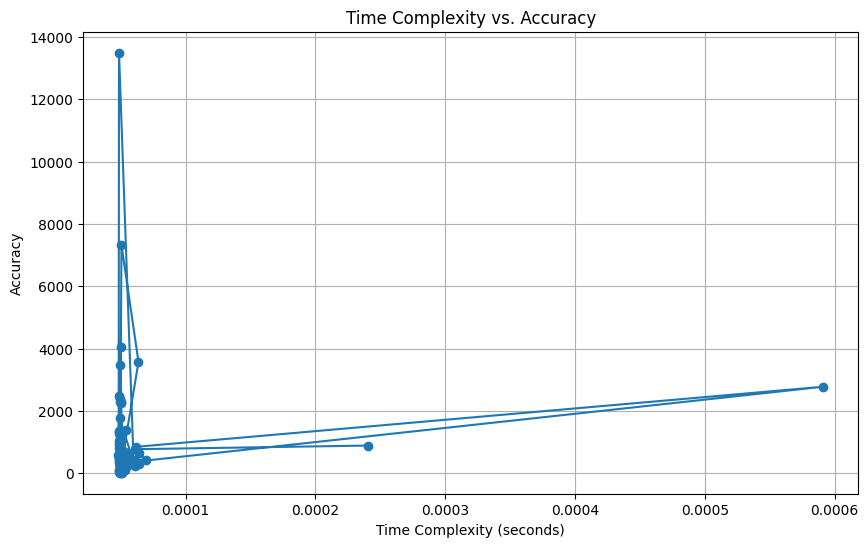

In [ ]:
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from pdb_data_no_dups.csv
data = pd.read_csv('/pdb_data_no_dups.csv')

# Define the Newton-Raphson optimization function for a quadratic problem
def newton_raphson(observed_data, initial_guess, max_iterations=100, tol=1e-6):
    guess = initial_guess
    for iteration in range(max_iterations):
        gradient = 2 * (guess**2 - observed_data)  # Quadratic function: f(x) = x^2
        hessian = 2
        step = -gradient / hessian
        guess += step
        if abs(step) < tol:
            break
    return guess

# Initialize variables to store data for the graph
time_complexity_values = []
accuracy_values = []

# Run Newton-Raphson optimization for different initial guesses
for _ in range(100):
    initial_guess = random.uniform(-10, 10)  # Vary initial guess in a wider range
    observed_data = random.choice(data['residueCount'])  # Use residueCount column from the dataset
    start_time = time.time()

    # Perform Newton-Raphson optimization
    optimized_solution = newton_raphson(observed_data, initial_guess)

    end_time = time.time()
    elapsed_time = end_time - start_time

    # Check for extreme values and replace with a finite value if necessary
    if np.isinf(optimized_solution) or np.isnan(optimized_solution):
        optimized_solution = 0  # Replace with a suitable finite value

    accuracy = abs(observed_data - optimized_solution)
    time_complexity_values.append(elapsed_time)
    accuracy_values.append(accuracy)

# Calculate and print average time complexity and accuracy
avg_time_complexity = sum(time_complexity_values) / len(time_complexity_values)
avg_accuracy = sum(accuracy_values) / len(accuracy_values)

print(f'Average Time Complexity: {avg_time_complexity} seconds')
print(f'Average Accuracy: {avg_accuracy}')

# Plot the time complexity vs. accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(time_complexity_values, accuracy_values, marker='o', linestyle='-')
plt.xlabel('Time Complexity (seconds)')
plt.ylabel('Accuracy')
plt.title('Time Complexity vs. Accuracy')
plt.grid(True)
plt.show()
